In [205]:
from xgboost import XGBClassifier
from xgboost import plot_tree
import optuna
import optuna_dashboard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,validation_curve
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,precision_score,f1_score,recall_score

In [3]:
data=pd.read_csv(r"C:\Users\Avijit\Desktop\AgriAssure\CROP_RECOMMENDATION\PROCESS_DATASET\crop_recommendation_processed.csv")

In [152]:
x,y=data.iloc[:,:-1],data.iloc[:,-1:]

In [5]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=42)

In [6]:
def objective(trial):
    params={
        'max_depth':trial.suggest_int('max_depth',2,4),
        'learning_rate':trial.suggest_float('learning_rate',0.0001,0.3),
        'subsample':trial.suggest_float("subsample",0.5,1.0),
        'n_estimators':trial.suggest_int('n_estimators',50,300),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'objective': 'multi:softprob',
        'eval_metric': 'mlogloss',
        'booster': 'gbtree',
    }
    model=XGBClassifier(**params)
    score=cross_val_score(model,xtrain,ytrain,cv=3,scoring='accuracy').mean()
    return score

In [81]:
study=optuna.create_study(direction='maximize',study_name='xgb_study',storage='sqlite:///STUDY/xgb_study.db',load_if_exists=True)
study.optimize(objective,n_trials=50)


[I 2025-06-26 13:50:17,128] A new study created in RDB with name: xgb_study
[I 2025-06-26 13:50:19,158] Trial 0 finished with value: 0.9869353628968957 and parameters: {'max_depth': 4, 'learning_rate': 0.14929218677908576, 'subsample': 0.6781656140728695, 'n_estimators': 83, 'reg_alpha': 0.5186364001465354, 'reg_lambda': 3.2767920803675494}. Best is trial 0 with value: 0.9869353628968957.
[I 2025-06-26 13:50:22,326] Trial 1 finished with value: 0.9857996445550445 and parameters: {'max_depth': 3, 'learning_rate': 0.2606010677640995, 'subsample': 0.6450610702162853, 'n_estimators': 292, 'reg_alpha': 3.6264768903093874, 'reg_lambda': 2.7549047588487605}. Best is trial 0 with value: 0.9869353628968957.
[I 2025-06-26 13:50:24,433] Trial 2 finished with value: 0.9869382700257572 and parameters: {'max_depth': 4, 'learning_rate': 0.18358309678419146, 'subsample': 0.6155930709357911, 'n_estimators': 160, 'reg_alpha': 3.9755201394909143, 'reg_lambda': 3.631755299534905}. Best is trial 2 with val

In [9]:
study = optuna.load_study(
    study_name="xgb_study",
    storage="sqlite:///C:/Users/Avijit/Desktop/AgriAssure/CROP_RECOMMENDATION/RESULT/xgboost_hypertuning/xgb_study.db"
)

In [10]:
study.best_params


{'max_depth': 3,
 'learning_rate': 0.15855086372172614,
 'subsample': 0.5461741059826021,
 'n_estimators': 215,
 'reg_alpha': 0.41486612120055527,
 'reg_lambda': 1.008710925137758}

In [14]:
optuna_dashboard.run_server("sqlite:///C:/Users/Avijit/Desktop/AgriAssure/CROP_RECOMMENDATION/MODELS/STUDY/xgb_study.db")

Bottle v0.13.4 server starting up (using WSGIRefServer())...
Listening on http://localhost:8080/
Hit Ctrl-C to quit.

127.0.0.1 - - [26/Jun/2025 14:20:48] "GET / HTTP/1.1" 302 0
127.0.0.1 - - [26/Jun/2025 14:20:49] "GET /dashboard HTTP/1.1" 304 0
127.0.0.1 - - [26/Jun/2025 14:20:49] "GET /static/bundle.js HTTP/1.1" 304 0
127.0.0.1 - - [26/Jun/2025 14:20:50] "GET /api/studies HTTP/1.1" 200 137


In [163]:
params={'max_depth': 2,
 'learning_rate': 0.01294189018381488,
 'subsample': 0.5,
 'n_estimators': 190,
 'reg_alpha': 0.320870803141203034,
 'reg_lambda': 0.32714436883330138,
 'booster':'gbtree',
 'objective':'multi:softprob'
 }
model=XGBClassifier(**params)


In [164]:
model.fit(xtrain, ytrain)


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01294189018381488, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=190, n_jobs=None,
              num_parallel_tree=None, ...)

In [165]:
model.score(xtrain,ytrain)
model.score(xtest,ytest)

0.9636363636363636

In [166]:
ypred=model.predict(xtest)
print("ACCURACY SCORE: ",accuracy_score(ytest,ypred))

ACCURACY SCORE:  0.9636363636363636


In [167]:
import joblib
joblib.dump(model,r'C:\Users\Avijit\Desktop\AgriAssure\CROP_RECOMMENDATION\MODELS\xgboost.pkl')

['C:\\Users\\Avijit\\Desktop\\AgriAssure\\CROP_RECOMMENDATION\\MODELS\\xgboost.pkl']

In [168]:
ypred=model.predict(xtest)
Cm=confusion_matrix(ytest,ypred)
# disp=ConfusionMatrixDisplay(confusion_matrix=Cm)
class_name=['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']


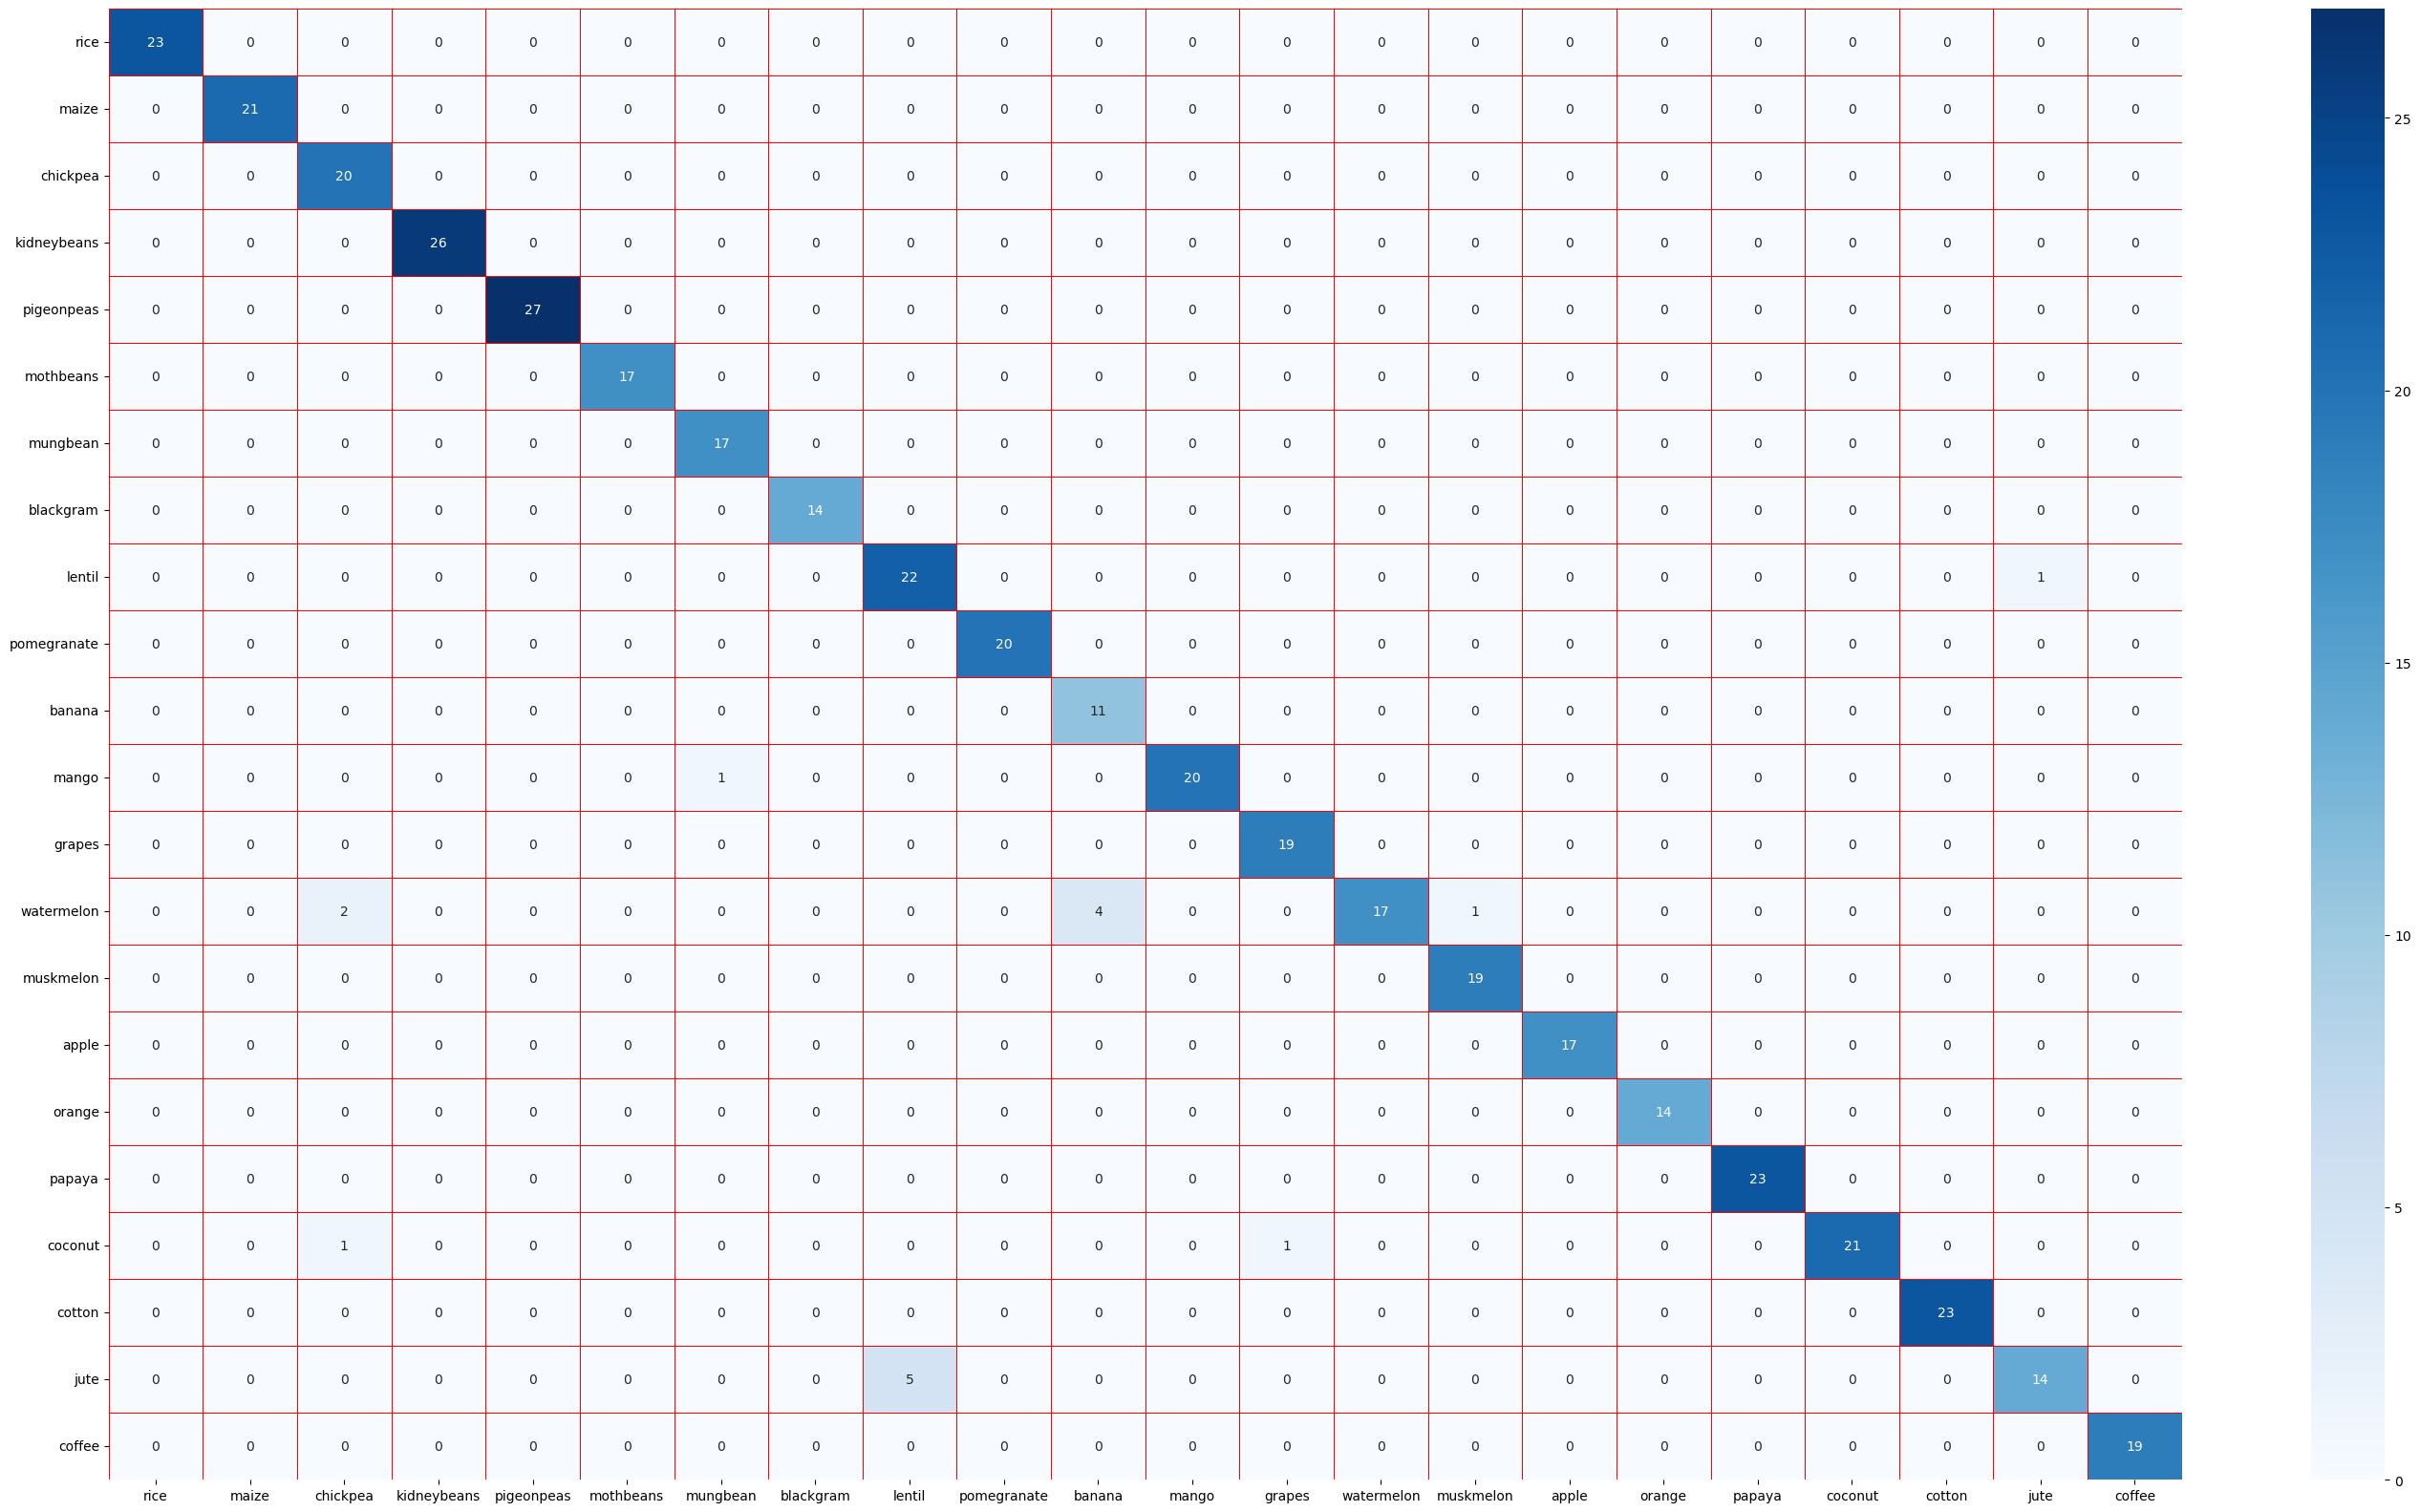

In [233]:
plt.figure(figsize=(35,20))
sns.heatmap(Cm,fmt='d',cmap="Blues",xticklabels=class_name,yticklabels=class_name,annot=True,linecolor='red',linewidths=0.7)
plt.xticks(rotation=0)
plt.show()

In [203]:
metric=['Accuracy','Precision','Recall','F1 score']
score=[accuracy_score(ytest,ypred),precision_score(ytest,ypred,average='macro'),recall_score(ytest,ypred,average='macro'),f1_score(ytest,ypred,average='macro')]
score=[s*100 for s in score]

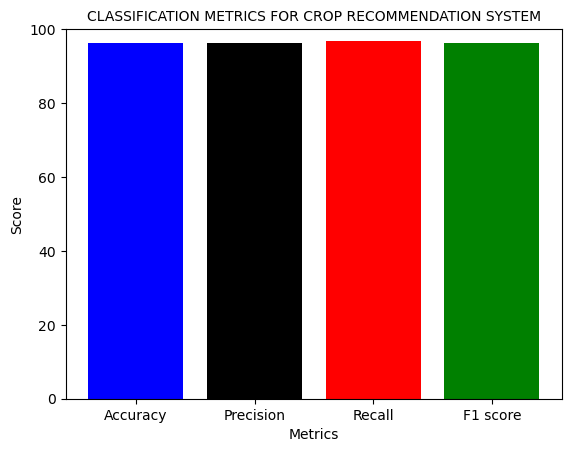

In [224]:
plt.bar(metric,score,color=['blue','black','red','green'])
plt.xlabel('Metrics')
plt.ylabel("Score")
plt.title("CLASSIFICATION METRICS FOR CROP RECOMMENDATION SYSTEM",fontsize=10)
plt.ylim(0,100)
plt.show()

In [212]:
degrees=np.arange(1,21)
trainscore,valscore=validation_curve(
    model,X=x,y=y,param_name='max_depth',param_range=degrees,cv=5,scoring='accuracy'
)
trainmean=trainscore.mean(axis=1)
valmean=valscore.mean(axis=1)



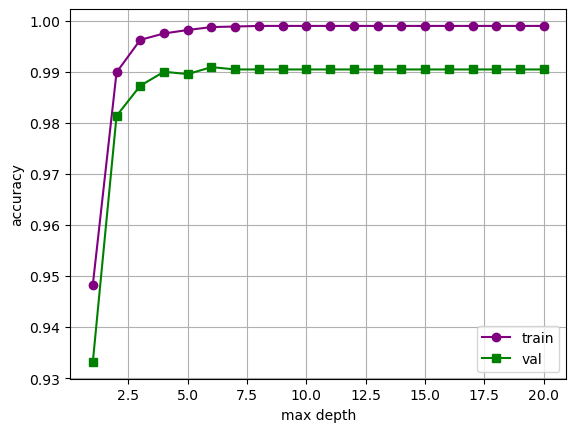

In [231]:
plt.plot(degrees,trainmean,label='training score',marker='o',color='purple')
plt.plot(degrees,valmean,label='test score',marker='s',color='green')
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.grid()
plt.legend(['train','val'])
plt.show()